# Second Order Methods

In [1]:
#%matplotlib inline
#import numpy as np
#import pylab as pl
import math
#pl.rc("savefig", dpi=100)
#pl.style.use('classic')

# load libraries and set plot parameters
import numpy as np
#import PrettyTable as pt

import matplotlib.pyplot as pl
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
#pl.rcParams['savefig.dpi'] = 1000

#pl.rcParams['figure.autolayout'] = False
#pl.rcParams['figure.figsize'] = 10, 6
#pl.rcParams['axes.labelsize'] = 18
#pl.rcParams['axes.titlesize'] = 20
#pl.rcParams['font.size'] = 16
#pl.rcParams['lines.linewidth'] = 2.0
#pl.rcParams['lines.markersize'] = 8
#pl.rcParams['legend.fontsize'] = 14

#pl.rcParams['text.usetex'] = True
#pl.rcParams['font.family'] = "serif"
#pl.rcParams['font.serif'] = "cm"
#pl.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

%config InlineBackend.figure_format = 'svg'

## Introduction

* problem to solve: find approximation of $x^*$ which satisfies $$f(x^*) = 0$$

* *iterative method* generates sequence $x^{(k)}$ by choosing $x^{(0)}$ and using recursion $$x^{(k+1)} = F(x^{(k)})$$
  where the iteration function $F$ satisfies
  
    * $x^* = F(x^*)$
    * $F(x)$ is $k$ times continuously differentiable for some $k>0$
    
* error of the approximation $x^{(k)}$: $$e^{(k)} = x^{(k)} - x^*$$

## Finite termination

**Proposition:** If $e_k=0$ for some $k$ then $e_j=0$ for all $j>k$.

**Proof** consequence of property $x^* = F(x^*)$.

* In this case we have a finitely terminating iterative method

---------------------------------------------------

## Example: $f(x)$ piecewise linear

In [2]:
#y= log2x
def f(x):
    nx = np.floor(np.log2(x))
    y  = nx + x/2**nx - 2*math.pi
    return y
xg = np.linspace(1, 70, 200)
yg = f(xg)

---------------------------------------------------------------------------------------------

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


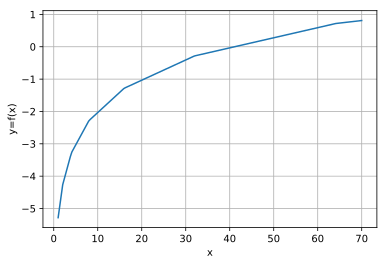

In [3]:
pl.plot(xg,yg); pl.xlabel('x'); pl.ylabel('y=f(x)'); pl.grid('on');

----------------------------------------------------------------------

In [4]:
def F(x):   # "Newton-like" method
    nx = np.floor(np.log2(x))
    y  = nx + x/2**nx - 2*math.pi
    dy = 2.0**(-nx)
    return x - y/dy, y
xk = 1.0
for k in range(5):
    xkp1, yk = F(xk)
    print("xk = {:8.6g}, f(xk) = {:2.4g}".format(xk, yk))
    xk = xkp1

xk =        1, f(xk) = -5.283
xk =  6.28319, f(xk) = -2.712
xk =  17.1327, f(xk) = -1.212
xk =   36.531, f(xk) = -0.1416
xk =  41.0619, f(xk) =  0


      
## Convergence

$$\renewcommand{\R}{\mathbb{R}}$$

**Definition:** An iterative method is *convergent* if it generates a convergent sequence $x^{(k)}$, i.e., if for each
  $\epsilon>0$ there exists an integer $k$ such that $|e^{(k)}| \leq \epsilon$.
  
**Proposition:** If $\lim |e^{(k+1)}/e^{(k)}| = q$ for some $q<1$ then the iterative method is convergent.

* If $q>0$ we say that the convergence is *linear* or *geometric*
* If $q=0$ we say that the convergence is *superlinear*

## Types of convergence

* sequence $x^{(k)}$ *convergent* if $e^{(k)} \rightarrow 0$, i.e., for each $\epsilon>0$ exists $k$ such that
  $|e^{(k)}| \leq \epsilon$. Any convergent sequence
    * terminates after a finite number of steps if $e^{(k)} = 0$ for some $k\geq 0$
    * has *linear convergence* if $\lim_{k\rightarrow\infty} |e^{(k+1)}|/|e^{(k)}| = q$ for $q<1$
    * has *superlinear* convergence if $|e^{(k+1)}|/|e^{(k)}| \rightarrow 0$
    * has *quadratic convergence* if $|e^{(k+1)}|/|e^{(k)}|^2 \rightarrow C$ for some $C\in\R$
    
* remark: one might have $|e^{(k+1)}| = C |e^{(k)}|^2$ for a divergent sequence
    
## A simple result

**Proposition**
If $F$ defines a convergent iteration, be twice continuously differentiable and $F^\prime(x^*)=0$ then the
iteration is quadratically convergence.

**Proof.**

* Taylor's theorem:
  \begin{align*} e^{(k+1)} &= F(x^{(k)}) - x^* \\ &= F(x^*) + F^\prime(x^*)(x^{(k)}-x^*) + F^{\prime\prime}(\xi)(x^{(k)}-x^*)^2/2 - x^*\end{align*}
* due to condition on the first derivative of $F$ and $F(x^*)=x^*$ one has
  $$e^{(k+1)} = F^{\prime\prime}(\xi) \left(e^{(k)}\right)^2/2$$
  and as the second derivative $F^{\prime\prime}$ is bounded, one has $$|e^{(k+1)}| \leq C |e^{(k)}|^2$$
        
## Simple example $F(x) = x/2 + 1/x$ with $x^*=\sqrt{2}$

$$x^{(k+1)} = \frac{x^{(k)}}{2} + \frac{1}{x^{(k)}}$$

* derivative $F^\prime(x^*) = 1/2 - 1/2 = 0$ thus we get second order convergence

In [5]:
F = lambda x : x/2 + 1/x
xk = 1.0
for k in range(6):
    xk = F(xk)
    print(xk)

1.5
1.4166666666666665
1.4142156862745097
1.4142135623746899
1.414213562373095
1.414213562373095


## Square Root $x^*=\sqrt{s}$

* Ansatz: $$x^{(k+1)} - x^* = \alpha_k (x^{(k)}-x^*)^2$$
* thus $$x^{(k+1)} = \alpha_k \left(x^{(k)}\right)^2 - x^*(2x^{(k)}\alpha_k-1) + \alpha_k s$$

* choose $\alpha_k = 1/2x_k$ to get $$x^{(k+1)} = F(x^{(k)})$$
  with $$F(x) = \frac{1}{2}\left(x + \frac{s}{x}\right)$$

* as $F^\prime(x^*)=0$ second order convergent method for $\sqrt{s}$, recovers previous method for $s=2$
  to compute $\sqrt{s}$ and for $s=2$ one gets the previous method again
* see convergence in 5 steps below (much faster than bisection!)

-----------------------------------------------------------------

In [6]:
F = lambda x, s=3 : (x + s/x)/2
xk = 1.0
for k in range(5):
    xk = F(xk)
    print("xk= {:2.16f}\t    ek = {:2.16g}".format(xk, xk - math.sqrt(3)))

xk= 2.0000000000000000	    ek = 0.2679491924311228
xk= 1.7500000000000000	    ek = 0.01794919243112281
xk= 1.7321428571428572	    ek = 9.204957398001312e-05
xk= 1.7320508100147274	    ek = 2.44585018904786e-09
xk= 1.7320508075688772	    ek =  0


## Newton’s Method for Solving Equations

* idea: use $f(x^{(k)})$ to get information about the error $e^{(k)}$
    $$f(x^{(k)}) = f(x^*) + e^{(k)} f^\prime(\xi)$$
    by the mean value theorem, there exists a $\xi$ between $x^*$ an $x^{(k)}$
    
* the error is then
    $$e^{(k)} = \frac{f(x^{(k)})}{f^\prime(\xi)}$$
    
* recall that $x^* = x^{(k)} - e^{(k)}$ which motivates taking an approximation of the error
   to correct $x^{(k)}$ as
   $$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f^\prime(x^{(k)})} $$
   this is one step of the *Newton method* for the solution of nonlinear equations
   
--------------------------------------------

* it follows that the iteration function defining Newton's method is
$$F(x) = x - \frac{f(x)}{f^\prime(x)}$$

* by the quotient rule, one has for twice continuously differentiable $f(x)$:
$$F^\prime(x) = 1 - \frac{f^\prime(x)^2 - f(x)f^{\prime\prime}(x)}{f^\prime(x)^2} 
              = \frac{f(x)f^{\prime\prime}(x)}{f^\prime(x)^2}$$
  and as $f(x^*) = 0$ one sees that $F^\prime(x^*)=0$ and thus Newton's method is second order convergent.
  Note, however, that the result above does only guarantee the convergence order, not, that the method is 
  convergent which needs to be shown by independent means.

## Example

Using Newton’s method, employing double precision computation, find the negative zero of the function $f(x)=\exp(x)-1.5-\arctan(x)$.

In [7]:
# example function and derivative, domain = [-20,-5]

f = lambda x: np.exp(x)-1.5-np.arctan(x)
fp = lambda x: np.exp(x) - 1.0/(1.0+x**2)
xg = np.linspace(-20, -5, 200)

-----------------------------------------------------------------------

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


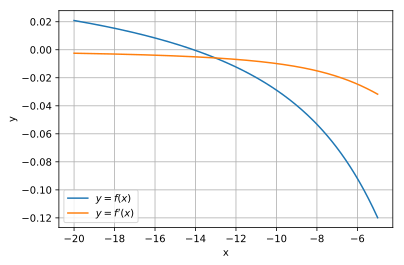

In [8]:
pl.plot(xg,f(xg),label="$y=f(x)$")
pl.plot(xg,fp(xg),label="$y=f^\prime(x)$")
pl.xlabel('x'); pl.ylabel("y"); pl.grid('on'); pl.legend(loc=3);

--------------------------------------------------------------

In [9]:
# Newton's method
xk = -12.5 # start in middle
for k in range(5):
    print("xk = {:3.8f}, f(xk) = {:3.8g}".format(xk, f(xk)))   
    xk -= f(xk) / fp(xk)

xk = -12.50000000, f(xk) = -0.0090299323
xk = -13.92078945, f(xk) = -0.0009145981
xk = -14.09897378, f(xk) = -1.1488979e-05
xk = -14.10126940, f(xk) = -1.8592932e-09
xk = -14.10126977, f(xk) =   0


## Step 1:  Show that $F(x)= x - f(x)/f^\prime(x)$ maps interval [-20,-5] into itself

In [10]:
# Example  -- Step 1
f  = lambda x: np.exp(x)-1.5-np.arctan(x)
fp = lambda x: np.exp(x) - 1.0/(1.0+x**2)
F  = lambda x: x - f(x)/fp(x)

xg  = np.linspace(-20,-5,200)
Fxg = F(xg)

------------------------------------------------------------------

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


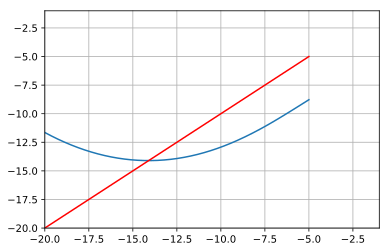

In [11]:
pl.plot(xg,Fxg, xg,xg, 'r'); pl.axis([-20,-1,-20,-1]); pl.grid('on')

## Step 2: show that $F$ is contractive on interval [-20,-5]

* We show that $-1 < F^\prime(x) < 1$ (here by plot)

In [12]:
# Example -- Step 2
fpp = lambda x : np.exp(x) + 2*x/(1.0+x**2)**2
Fp  = lambda x:  f(x)*fpp(x)/fp(x)**2

----------------------------------------------------------------------------------------

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


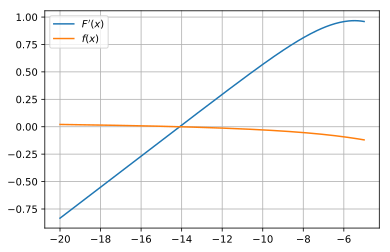

In [13]:
pl.plot(xg, Fp(xg), label='$F^\prime(x)$'); pl.plot(xg, f(xg), label='$f(x)$'); pl.legend(loc=2); pl.grid('on')

## Step 3: (local) second order convergence

* $F^\prime(x^*) = 0$ by definition
* $F^{\prime\prime}(x)$ bounded 
    * plot of $F^\prime(x)$ looks like a straight line
    * for an analytic approach based on Taylor expansion see below

## Error bound using Taylor expansion of $f$

$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f^\prime(x^{(k)})}$$

* Error formula (Newton = error correction) $$e^{(k+1)} = e^{(k)} - \frac{f(x^{(k)})}{f^\prime(x^{(k)})}$$
* Expansion around $x^{(k)}$ 
  $$0=f(x^*) = f(x^{(k)}) - f^\prime(x^{(k)}) e^{(k)} + \frac{f^{\prime\prime}(\xi)}{2} (e^{(k)})^2$$

* Substituting $f(x^{(k)})$ in the error formula one sees that the first two terms cancel and one gets
  $$|e^{(k+1)}| = \left|\frac{f^{\prime\prime}(\xi)}{2f^\prime(x^{(k)})}\right| (e^{(k)})^2 \leq C (e^{(k)})^2$$
  with $$C = \frac{\max_x |f^{\prime\prime}(x)|}{2\min_x |f^\prime(x)|}$$

## Example continued

* For our example we get $C= 1.6$. Thus error gets reduced once the error is less than $1/1.6$ according to this
bound. Consequently, one might not see second order convergence effects for the first few steps.

## Calculating the Derivative

* if derivative unknown approximate by finite difference 
    $$f^{\prime}(x)\approx \frac{f(x+h)-f(x)}{h}$$ which is accurate when $h$ is small
    
* finite difference most affected by rounding errors when $h$ small
* two function evaluations required per step

alternative for this case: secant method, see below


## The Secant Method

* start by expanding $f(x^*)$ – similar to Newton’s method
  $$0 = f(x^*) = f(x^{(k)}) + \frac{f(x^*)-f(x^{(k)})}{x^*-x^{(k)}}\, (x^*-x^{(k)}).$$ 
* use this to get formula for exact solution
  $$x^* = x^{(k)} - f(x^{(k)}) \frac{x^*-x^{(k)}}{f(x^*) - f(x^{(k)})}$$ 

* and the error is then   
  $$e^{(k)} = x^{(k)} - x^* = f(x^{(k)})\,\frac{x^*-x^{(k)}}{f(x^*)-f(x^{(k)})}.$$ 
  
----------------------------------------------------------------------------
  
* substitute the unknown $x^*$ by $x^{(k-1)}$ in this formula to get an approximation of the error
  $$\hat{e}^{(k)} = f(x^{(k)})\,\frac{x^{(k-1)}-x^{(k)}}{f(x^{(k-1)})-f(x^{(k)})}.$$ 

* the secant method uses this approximation for error correction
  $$x^{(k+1)} = x^{(k)} - \hat{e}^{(k)} 
              = x^{(k)} -f(x^{(k)})\,\frac{x^{(k-1)}-x^{(k)}}{f(x^{(k-1)})-f(x^{(k)})}.$$

---------------------------------------------------------

* interpretation:

    * intersect the straight line through $(x^{(k)},f(x^{(k)})$ and $(x^{(k-1)},f(x^{(k-1)})$ with 
      the x-axis to get $x^{(k+1)}$
    * note that this line is a secant of the graph of $f$
    * one could use other points than the last two points in the sequence, for example taking
      $x^{(k-1)}$ and $x^{(k-3)}$ which leads to a
        * larger approximation error
        * smaller rounding error
        
* faster than first order convergence but less than second order

* alternative: regula falsi, maintain the sign change for the two points like in the bisection method.
     this leads to a slower (first order convergent method)
     
-------------------------------------------------------------

In [14]:
# Secant algorithm

f = lambda x: np.exp(x)-1.5-np.arctan(x)
F = lambda xk,xm,f=f: xk-f(xk)*(xk-xm)/(f(xk)-f(xm)) 
xk   = -12.5
xkm1 = -20

for k in range(7):
    print("xk = {:3.8f}, f(xk) = {:3.8g}".format(xk, f(xk)))   
    xkp1 = F(xk,xkm1)
    xk, xkm1 = xkp1, xk

xk = -12.50000000, f(xk) = -0.0090299323
xk = -14.76747011, f(xk) = 0.0031835278
xk = -14.17643742, f(xk) = 0.00037408936
xk = -14.09773876, f(xk) = -1.7670435e-05
xk = -14.10128848, f(xk) = 9.3615066e-08
xk = -14.10126978, f(xk) = 2.3303137e-11
xk = -14.10126977, f(xk) =   0


## Secant Algorithm -- convergence and order of convergence

* convergence proof: show that $F(x_1,x_2)$ is contractive in $x_1$ 
* error formula: similar approach as for Newton's method
    $$e^{(k+1)} \approx -\frac{1}{2}\frac{f^{\prime\prime}(x^*)}{f^{\prime}(x^*)}
        e^{(k)}e^{(k-1)} \leq e^{(k)}e^{(k-1)}$$
        
    * expect faster than linear convergence as errors go to zero
    * expect slower convergence than for Newton as errors decrease in value
* can prove $$\left|e^{(k+1)}\right| \leq A \left|e^{(k)}\right|^\phi$$
  where $\phi =\frac{1+\sqrt{5}}{2}\approx 1.62$ (golden mean ratio)
  * if one knows that error of order $\phi$ then it is not hard to show that the rate is the golden mean
  * it is more difficult to show that the error is of some order $\phi$